# Import library

In [1]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import line_function
import line_visualize

----------

# Read file.

In [2]:
chat = line_function.read_chat('[LINE] Chat with bammmn')

# Convert to chat file to data frame

In [4]:
platform = int(input('Mobile 1, PC 2 : '))
if platform == 1:
    df = line_function.reformat(chat)
elif platform == 2:
    df = line_function.reformat_pc(chat)

Mobile 1, PC 2 : 1


C:\Users\INDY\Miniconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
df.head()

,day,date,user,messages,date_time,month_year,dd,minutes,group
0,Tue,06/08/2019,indy,วันนี้มึงเลิกกี่โมงง,2019-08-06 14:35:00,08/2019,06,875,12-15
1,Tue,06/08/2019,bammmn.,วันนี้กูยกกกกก,2019-08-06 14:39:00,08/2019,06,879,12-15
2,Tue,06/08/2019,bammmn.,เรียนพน.~~~,2019-08-06 14:39:00,08/2019,06,879,12-15
3,Tue,06/08/2019,bammmn.,[Photo],2019-08-06 14:39:00,08/2019,06,879,12-15
4,Tue,06/08/2019,bammmn.,นี้ตารางกูววว,2019-08-06 14:39:00,08/2019,06,879,12-15


----------

# Visualization

### Which user most talkative?

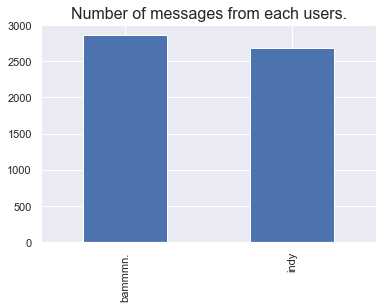

In [15]:
plt.figure()
p = df['user'].value_counts().plot.bar()
p.set_title('Number of messages from each users.', fontsize=16)
plt.show()

### Which day is the most chatting day and who most talkative?

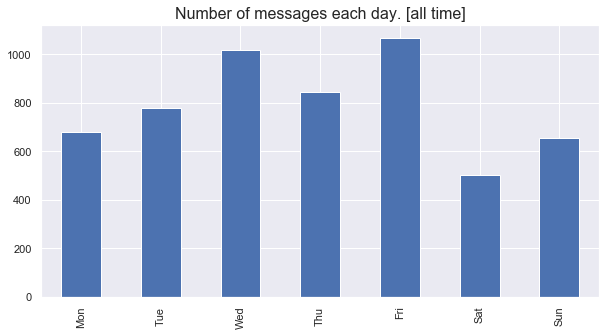

In [16]:
plt.figure(figsize=(10, 5))
p = df['day'].value_counts().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).plot.bar()
p.set_title('Number of messages each day. [all time]', fontsize=16)
plt.show()

<Figure size 432x288 with 0 Axes>

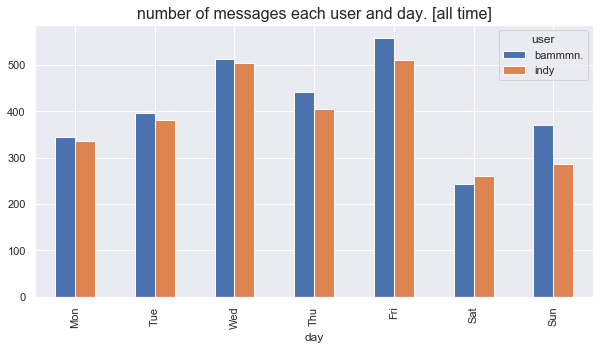

In [17]:
line_visualize.day_message(df)

## Message per days [specific month / year]

In [18]:
# Find all month year in chat.
month_year = line_function.find_my(df)
month_year

['11/2019', '10/2019', '08/2019', '09/2019', '01/2020', '12/2019']

#### Show specific month / year

In [19]:
monthyear = str(input())

12/2019


<Figure size 432x288 with 0 Axes>

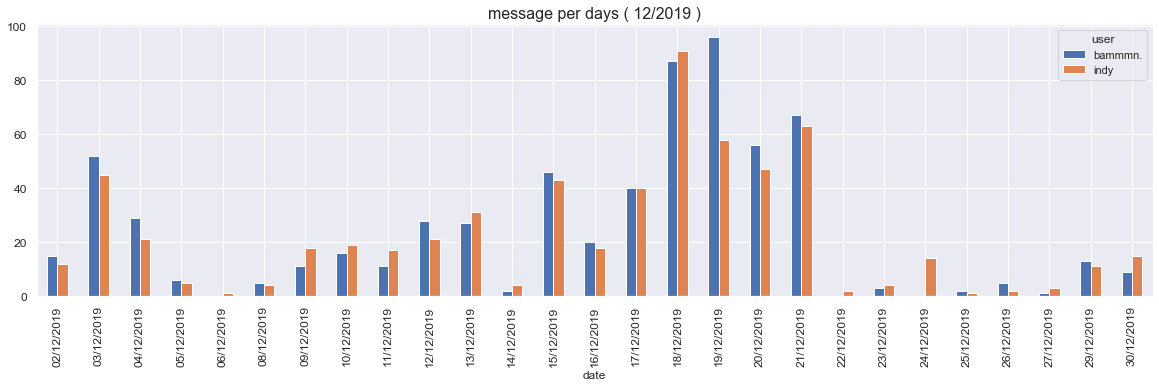

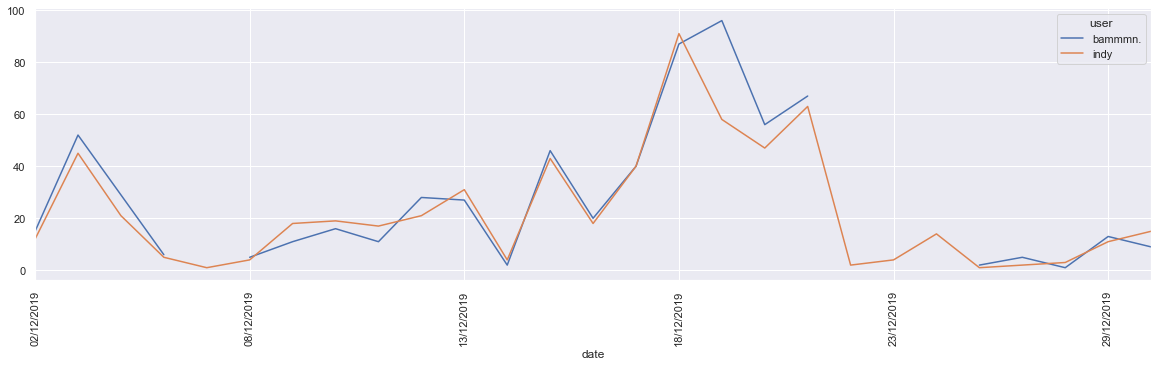

In [20]:
line_visualize.filter_plot(df, monthyear)

#### Show all.

In [21]:
# for i in month_year:
#     line_visualize.filter_plot(df, i)

### Which duration most talkative?

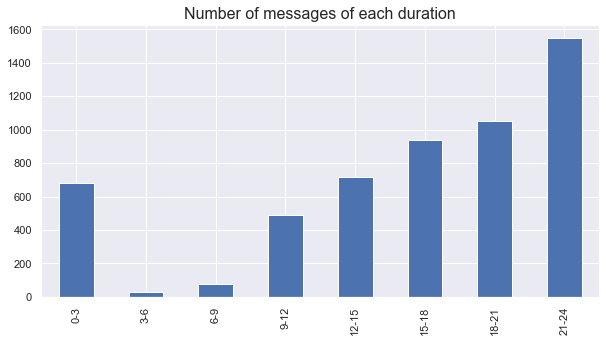

In [22]:
plt.figure(figsize=(10, 5))
p = df['group'].value_counts().reindex(['0-3', '3-6', '6-9', '9-12','12-15', '15-18', '18-21', '21-24']).plot.bar()
p.set_title('Number of messages of each duration', fontsize=16)
plt.show()

### Which day and duration that most talkative?

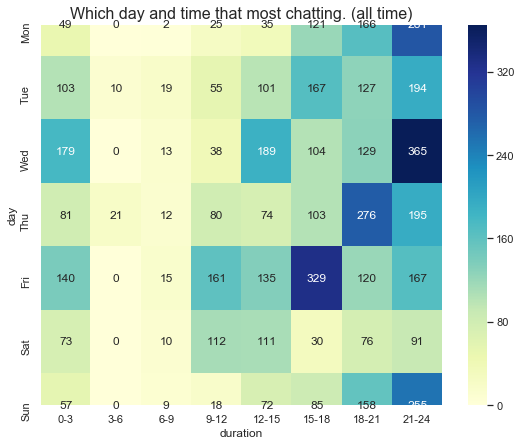

In [23]:
line_visualize.day_duration(df)

----------

# Response time of each user

In [33]:
# Show all month year that have data.
month_year = line_function.find_my(df)
month_year

['11/2019', '10/2019', '08/2019', '09/2019', '01/2020', '12/2019']

In [50]:
# Choose the month and year.
df_filter = line_function.filter_my(df, '11/2019')
# Create dataframe of reply to chat.
responsetime_df = line_function.urt(df_filter)
# Show output.
line_function.rpt_summary(df, responsetime_df)

Responestime / user
User name : bammmn.
Average response time : 39.69230769230769 minutes
Longest response time : 906 minutes
Shotest response time : 0 minutes

User name : indy
Average response time : 19.45014245014245 minutes
Longest response time : 639 minutes
Shotest response time : 0 minutes



In [64]:
responsetime_df

,user,responsetime,day
0,indy,0,01
1,bammmn.,2,01
2,indy,0,01
3,bammmn.,1,01
4,indy,2,01
...,...,...,...
697,bammmn.,176,29
698,indy,23,29
699,bammmn.,30,29
700,indy,12,29
